In [1]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
tf.config.get_visible_devices()

True


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Read books

In [5]:
from data.Dataset import Dataset

names = ["Gan", "Tan_bogoraz"]
dataset = Dataset(names)
dataset.data

,label,author,text
0,0,Gan,﻿Е. А. Ган\n\n Идеал...
1,1,Tan_bogoraz,Владимир ТАН-БОГОРАЗ\n \n НА РЕКЕ РОСОМА...


Clean text from punctuation

In [6]:
dataset.preprocess()
dataset.data

Preprocessing Tan_bogoraz: 100%|██████████| 28244/28244 [00:03<00:00, 7081.62it/s]


,label,author,text
0,0,Gan,ган идеал дом дворянский собрание великолепно ...
1,1,Tan_bogoraz,владимир тан богораз река росомаший третий нед...


VISUALIZING THE DATA

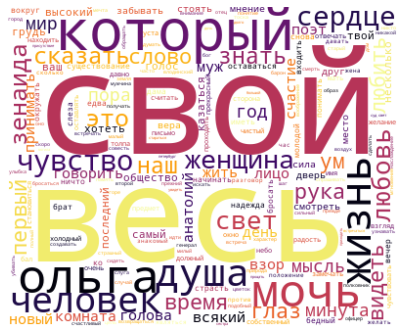

<Figure size 432x288 with 0 Axes>

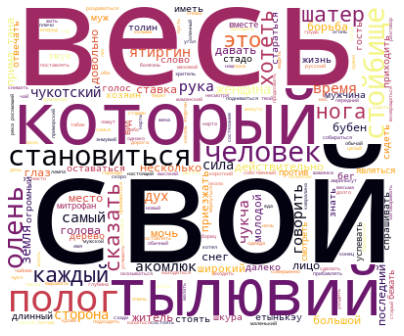

<Figure size 432x288 with 0 Axes>

In [7]:
from utils.utils import plot_words_cloud

plot_words_cloud(dataset.data)

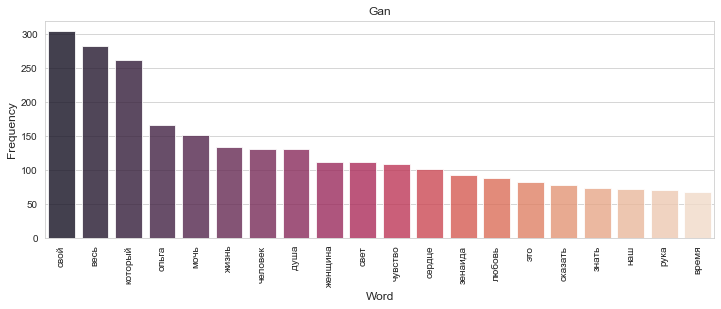

<Figure size 432x288 with 0 Axes>

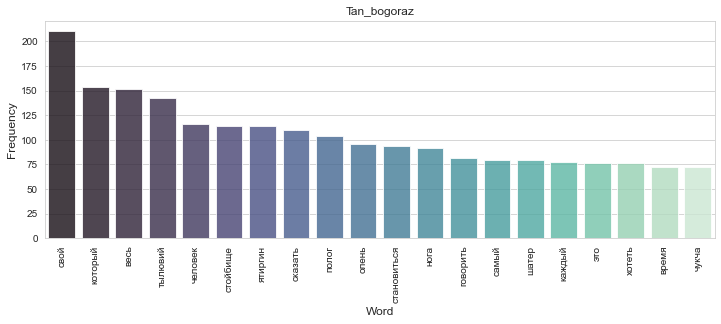

<Figure size 432x288 with 0 Axes>

In [8]:
from utils.utils import plot_words_count

plot_words_count(dataset.data)

Count and visualize as barplots

d:\study\pyenvnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


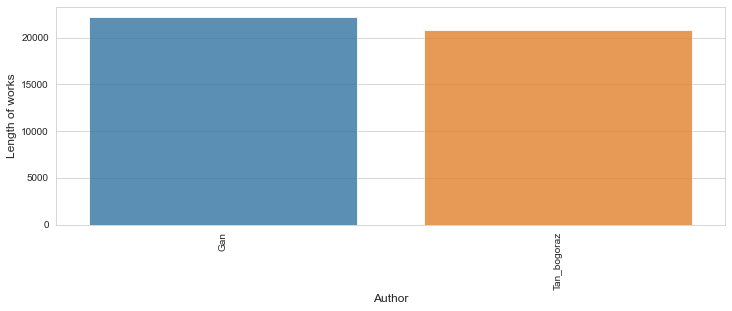

<Figure size 432x288 with 0 Axes>

In [9]:
from utils.utils import plot_compare_bars

plot_compare_bars(dataset.data)

In [10]:
dataset.chunking()
dataset.data

,label,author,text
0,0,Gan,"[[ган, идеал, дом, дворянский, собрание, велик..."
0,1,Tan_bogoraz,"[[владимир, тан, богораз, река, росомаший, тре..."


In [11]:
from models.merge import ELMo

dataset.embedding(ELMo)

ELMo embedding process::   0%|          | 0/2 [00:00<?, ?it/s]2021-11-29 00:27:23,895 : INFO : Loading model from ./elmo/...
2021-11-29 00:27:23,896 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\pyenvnn\lib\site-packages\simple_elmo\model.py:529: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.ad

(1072,)

In [12]:
dataset.data

,label,author,text,embeddings
0,0,Gan,"[ган, идеал, дом, дворянский, собрание, велико...","[[-0.051519036293029785, 0.15687675774097443, ..."
1,0,Gan,"[фрачник, гордо, расправлять, ус, всклокочиват...","[[-0.4148758053779602, -0.3548443913459778, -0..."
2,0,Gan,"[оглашать, зала, вступление, полонез, русалка,...","[[0.048503607511520386, -0.11552993953227997, ..."
3,0,Gan,"[кой, мужчина, проходить, диван, останавливать...","[[-1.257854700088501, -0.20865768194198608, 0...."
4,0,Gan,"[который, меньшой, голова, выше, свой, папеньк...","[[-0.7886856198310852, -0.1845075488090515, -0..."
...,...,...,...,...
514,1,Tan_bogoraz,"[прекращать, вызывать, бубен, целый, серия, тр...","[[-0.48771852254867554, 0.0348808579146862, -0..."
515,1,Tan_bogoraz,"[тылювий, хотеть, прибавлять, она, короткий, п...","[[-0.6014944314956665, -0.13086415827274323, -..."
516,1,Tan_bogoraz,"[шаманский, сила, самодовольство, успех, выказ...","[[-0.38128647208213806, 0.5739477872848511, 0...."
517,1,Tan_bogoraz,"[позабывать, дух, день, действительно, состоят...","[[-0.7613673210144043, -0.20127227902412415, 0..."


In [13]:
from dtaidistance import dtw_ndim

distance = dtw_ndim.distance(dataset.embeddings[0], dataset.embeddings[1])
distance

2518.6914912862867

In [19]:
from data.TrainSet import TrainSet

train_set = TrainSet(dataset.data)
train_set.shape

,Train,Test
X,"(911, 40, 1024)","(161, 40, 1024)"
Y,"(911, 3)","(161, 3)"


In [15]:
from models.merge import CNN, BiLSTM, Ensemble

cnn = CNN(train_set.X_shape())
bilstm = BiLSTM(train_set.X_shape())
cnn_bilstm = Ensemble(train_set)

In [16]:
import tensorflow as tf
tf.compat.v1.experimental.output_all_intermediates(True)
cnn_bilstm.add(cnn)
cnn_bilstm.add(bilstm)
cnn_bilstm.build()
cnn_bilstm.fit()
cnn_bilstm.predict()

Train on 911 samples
Epoch 1/10
911/911 [==============================] - 4s 4ms/sample - loss: 0.3859 - accuracy: 0.8573
Epoch 2/10
911/911 [==============================] - 0s 315us/sample - loss: 0.0502 - accuracy: 0.9813

d:\study\pyenvnn\lib\site-packages\mlxtend\classifier\ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Using Testing Set for Classes Prediction


d:\study\pyenvnn\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0], dtype=uint8)

In [20]:
from data.TestSet import TestSet
from utils.constants import BOOKS_DIR

path = f"{BOOKS_DIR}/Sholokhov/and-quiet-flows-the-don.txt"
testing = TestSet(path, names)

TypeError: load_embeddings() takes 2 positional arguments but 3 were given

In [ ]:
testing.preds = cnn_bilstm.model.predict(testing.data)
testing.plot_prediction()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
cnts = [len(np.where(testing.preds == i)[0]) for i in range(2)]
fig = plt.figure(figsize=(12, 4))
fig.set_facecolor('white')

sns.barplot(testing.labels, cnts, alpha=0.8)
plt.ylabel('Chunks Attribution', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.xticks(rotation=90)
plt.show()
plt.savefig(f"./plots/{testing.author}_{testing.work}.png")

In [ ]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=testing.data, y=np.array(train_set.Y_train, dtype='uint8'), clf=cnn_bilstm.model)
